In [88]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '77e867bd-3250-49ca-83f8-65d8d181b760',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
#increase data limit
 

{'status': {'timestamp': '2022-08-25T21:11:02.230Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9615}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9705, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [89]:
type(data)

dict

In [90]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [91]:

#pd.json_normalize(data['status'])
df = pd.json_normalize(data['data'])

#add column to check when i run the data
df['timestamp'] = pd.to_datetime('now', utc=True)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9705,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19131862.00000,19131862.00000,NaN,1,NaN,NaN,None,2022-08-25T21:09:00.000Z,21662.73727,31612770362.53755,-0.38460,0.27711,-0.11762,-7.48091,2.85786,1.34261,-24.77333,414448500057.65356,39.57840,454917482742.17999,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00
1,1027,Ethereum,ETH,ethereum,6044,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,122109533.62400,122109533.62400,NaN,2,NaN,NaN,None,2022-08-25T21:09:00.000Z,1709.53431,15179649726.54975,-9.35670,0.14670,1.75092,-8.84315,23.03325,37.61547,-2.37939,208750436877.79773,19.93650,208750436877.79999,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00
2,825,Tether,USDT,tether,38855,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67549554915.42651,69157777033.00569,NaN,3,NaN,NaN,None,2022-08-25T21:09:00.000Z,1.00003,46905500004.91553,-2.98690,0.00227,-0.00112,0.00393,-0.00387,0.05116,0.11214,67551326479.42377,6.45220,69159590774.46001,None,2022-08-25T21:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-25 21:11:00.321391+00:00
3,3408,USD Coin,USDC,usd-coin,5956,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52143782433.69067,52143782433.69067,NaN,4,NaN,NaN,None,2022-08-25T21:09:00.000Z,1.00001,7419974314.12455,1.67920,0.00355,0.00479,-0.00022,-0.06208,-0.01931,-0.02036,52144559672.68271,4.98060,52144559672.68000,None,2022-08-25T21:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-25 21:11:00.321391+00:00
4,1839,BNB,BNB,bnb,1088,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-08-25T21:09:00.000Z,302.91976,1003409809.58587,7.01410,0.21013,1.18825,-0.38129,23.28400,26.33517,0.37891,48872244050.98485,4.66660,60583951556.88000,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00


In [92]:
#run api
def api_runner():
    global df
#call api
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '77e867bd-3250-49ca-83f8-65d8d181b760',
    }

    session = Session()
    session.headers.update(headers)
#test it, load it
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
   
    #format it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)                               
    df # = df.append(df2)
    
    #create a  csv file and add data
    if not os.path.isfile(r'/Users/fatma/Desktop/python/python script/API.csv'):
        df.to_csv(r'/Users/fatma/Desktop/python/python script/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/fatma/Desktop/python/python script/API.csv', mode='a', header=False)
        


In [31]:
#track time and run ann call func
import os
from time import time
from time import sleep

for i in range(333): #max in our api
    api_runner()
    print("API Runner completed succesfully")
    sleep(2)# sleep for 2 sec 
    
exit()

API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully
API Runner completed succesfully


KeyboardInterrupt: 

In [93]:
df3=pd.read_csv(r'/Users/fatma/Desktop/python/python script/API.csv')
df3.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9682,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19127081.00000,19127081.00000,NaN,1,NaN,NaN,NaN,2022-08-20T18:48:00.000Z,21245.94127,29052972584.16494,-20.66870,-0.12413,-0.73576,-13.05880,-7.07518,0.37337,-29.12937,406372839571.31451,40.05060,446164766646.70001,NaN,2022-08-20T18:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-20 18:50:15.988470+00:00
1,1,1027,Ethereum,ETH,ethereum,6018,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,122042535.06150,122042535.06150,NaN,2,NaN,NaN,NaN,2022-08-20T18:48:00.000Z,1606.72647,18173764522.29172,-21.48900,-0.98048,-5.56986,-18.86435,4.41793,39.90274,-20.11109,196088971504.36005,19.31860,196088971504.35999,NaN,2022-08-20T18:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-20 18:50:15.988470+00:00
2,2,825,Tether,USDT,tether,38536,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,67549562651.23161,69157777033.00569,NaN,3,NaN,NaN,NaN,2022-08-20T18:48:00.000Z,1.00007,64302127381.72679,0.00000,-0.00080,0.00615,-0.02001,0.00113,0.09485,0.12357,67554511173.42490,6.65640,69162843369.20000,NaN,2022-08-20T18:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-20 18:50:15.988470+00:00
3,3,3408,USD Coin,USDC,usd-coin,5860,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,52432353969.39456,52432353969.39456,NaN,4,NaN,NaN,NaN,2022-08-20T18:48:00.000Z,0.99999,7104084896.46752,0.00000,0.00133,-0.00967,0.01600,-0.00593,-0.04944,-0.02715,52431650439.81521,5.16630,52431650439.82000,NaN,2022-08-20T18:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-20 18:50:15.988470+00:00
4,4,1839,BNB,BNB,bnb,1071,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-20T18:48:00.000Z,282.87799,1343416349.57552,-10.89660,-0.69926,-1.17954,-13.16409,8.18257,26.60904,-10.88202,45638759672.53267,4.49690,56575597433.84000,NaN,2022-08-20T18:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-20 18:50:15.988470+00:00


In [94]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9705,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19131862.00000,19131862.00000,NaN,1,NaN,NaN,None,2022-08-25T21:09:00.000Z,21662.73727,31612770362.53755,-0.38460,0.27711,-0.11762,-7.48091,2.85786,1.34261,-24.77333,414448500057.65356,39.57840,454917482742.17999,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00
1,1027,Ethereum,ETH,ethereum,6044,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,122109533.62400,122109533.62400,NaN,2,NaN,NaN,None,2022-08-25T21:09:00.000Z,1709.53431,15179649726.54975,-9.35670,0.14670,1.75092,-8.84315,23.03325,37.61547,-2.37939,208750436877.79773,19.93650,208750436877.79999,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00
2,825,Tether,USDT,tether,38855,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67549554915.42651,69157777033.00569,NaN,3,NaN,NaN,None,2022-08-25T21:09:00.000Z,1.00003,46905500004.91553,-2.98690,0.00227,-0.00112,0.00393,-0.00387,0.05116,0.11214,67551326479.42377,6.45220,69159590774.46001,None,2022-08-25T21:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-25 21:11:00.321391+00:00
3,3408,USD Coin,USDC,usd-coin,5956,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52143782433.69067,52143782433.69067,NaN,4,NaN,NaN,None,2022-08-25T21:09:00.000Z,1.00001,7419974314.12455,1.67920,0.00355,0.00479,-0.00022,-0.06208,-0.01931,-0.02036,52144559672.68271,4.98060,52144559672.68000,None,2022-08-25T21:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-25 21:11:00.321391+00:00
4,1839,BNB,BNB,bnb,1088,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-08-25T21:09:00.000Z,302.91976,1003409809.58587,7.01410,0.21013,1.18825,-0.38129,23.28400,26.33517,0.37891,48872244050.98485,4.66660,60583951556.88000,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00


In [95]:
#circulation_supply cleanning

pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [96]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9705,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19131862.00000,19131862.00000,NaN,1,NaN,NaN,None,2022-08-25T21:09:00.000Z,21662.73727,31612770362.53755,-0.38460,0.27711,-0.11762,-7.48091,2.85786,1.34261,-24.77333,414448500057.65356,39.57840,454917482742.17999,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00
1,1027,Ethereum,ETH,ethereum,6044,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,122109533.62400,122109533.62400,NaN,2,NaN,NaN,None,2022-08-25T21:09:00.000Z,1709.53431,15179649726.54975,-9.35670,0.14670,1.75092,-8.84315,23.03325,37.61547,-2.37939,208750436877.79773,19.93650,208750436877.79999,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00
2,825,Tether,USDT,tether,38855,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,67549554915.42651,69157777033.00569,NaN,3,NaN,NaN,None,2022-08-25T21:09:00.000Z,1.00003,46905500004.91553,-2.98690,0.00227,-0.00112,0.00393,-0.00387,0.05116,0.11214,67551326479.42377,6.45220,69159590774.46001,None,2022-08-25T21:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-25 21:11:00.321391+00:00
3,3408,USD Coin,USDC,usd-coin,5956,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52143782433.69067,52143782433.69067,NaN,4,NaN,NaN,None,2022-08-25T21:09:00.000Z,1.00001,7419974314.12455,1.67920,0.00355,0.00479,-0.00022,-0.06208,-0.01931,-0.02036,52144559672.68271,4.98060,52144559672.68000,None,2022-08-25T21:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-25 21:11:00.321391+00:00
4,1839,BNB,BNB,bnb,1088,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,None,2022-08-25T21:09:00.000Z,302.91976,1003409809.58587,7.01410,0.21013,1.18825,-0.38129,23.28400,26.33517,0.37891,48872244050.98485,4.66660,60583951556.88000,None,2022-08-25T21:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-25 21:11:00.321391+00:00


In [97]:
#group by coins names
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.27711,-0.11762,-7.48091,2.85786,1.34261,-24.77333
Ethereum,0.14670,1.75092,-8.84315,23.03325,37.61547,-2.37939
Tether,0.00227,-0.00112,0.00393,-0.00387,0.05116,0.11214
USD Coin,0.00355,0.00479,-0.00022,-0.06208,-0.01931,-0.02036
BNB,0.21013,1.18825,-0.38129,23.28400,26.33517,0.37891


In [98]:
# use stack to change rows and columns

df5 = df4.stack()
df5.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     0.27711
         quote.USD.percent_change_24h   -0.11762
         quote.USD.percent_change_7d    -7.48091
         quote.USD.percent_change_30d    2.85786
         quote.USD.percent_change_60d    1.34261
dtype: float64

In [99]:
type(df5) 
#back to data frame

pandas.core.series.Series

In [100]:
df6 = df5.to_frame(name='values') # the names are values
df6.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.27711
        quote.USD.percent_change_24h -0.11762
        quote.USD.percent_change_7d  -7.48091
        quote.USD.percent_change_30d  2.85786
        quote.USD.percent_change_60d  1.34261

In [101]:
df6.count()

values    90
dtype: int64

In [102]:
#give it index

index = pd.Index(range(90))

#df7 = df6.set_index(index)
df7 = df6.reset_index()
df7.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.27711
1,Bitcoin,quote.USD.percent_change_24h,-0.11762
2,Bitcoin,quote.USD.percent_change_7d,-7.48091
3,Bitcoin,quote.USD.percent_change_30d,2.85786
4,Bitcoin,quote.USD.percent_change_60d,1.34261


In [103]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.27711
1,Bitcoin,quote.USD.percent_change_24h,-0.11762
2,Bitcoin,quote.USD.percent_change_7d,-7.48091
3,Bitcoin,quote.USD.percent_change_30d,2.85786
4,Bitcoin,quote.USD.percent_change_60d,1.34261


In [104]:
#change the name values
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8.head()


,name,percent_change,values
0,Bitcoin,1h,0.27711
1,Bitcoin,24h,-0.11762
2,Bitcoin,7d,-7.48091
3,Bitcoin,30d,2.85786
4,Bitcoin,60d,1.34261


In [105]:
#visulize

import seaborn as sns
import matplotlib.pyplot as plt

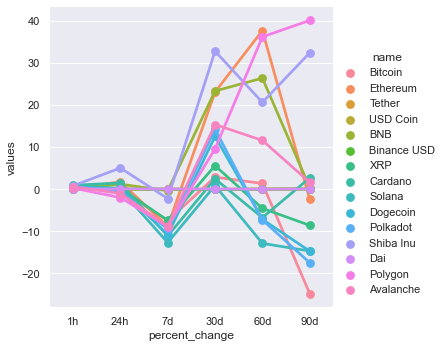

In [106]:
sns.catplot(x='percent_change',y='values',hue='name',data=df8,kind='point')

In [107]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,21662.73727,2022-08-25 21:11:00.321391+00:00


In [109]:
#visulize
#sns.set_theme(style='darkgrid')
#sns.lineplot(x='timestamp', y='quote.USD.price',data=df9)